# Parameter Screen

This notebooks how a parameter screen can be done on AlphaPept to find optimal values.

In [1]:
from alphapept.paths import SETTINGS_TEMPLATE_PATH, DEFAULT_SETTINGS_PATH
import numpy as np
import alphapept.interface
from alphapept.settings import load_settings_as_template 

SETTINGS_TEMPLATE = load_settings_as_template(SETTINGS_TEMPLATE_PATH)

In [2]:
results = []
n_sample = 5

group = 'features'

print(SETTINGS_TEMPLATE[group].keys())

for param in ['centroid_tol']: #Test 1 parameter for now
    for selector in np.linspace(SETTINGS_TEMPLATE[group][param]['min'], SETTINGS_TEMPLATE[group][param]['max'], n_sample):
        print(group, param, selector)
        
        if SETTINGS_TEMPLATE[group][param]['type'] == 'spinbox':
            selector = int(selector)
            
        settings = load_settings_as_template(DEFAULT_SETTINGS_PATH)

        settings['experiment']['file_paths'] =  ['F:/temp_test_run/thermo_IRT.raw']
        settings['fasta']['fasta_paths'] = ['F:/temp_test_run/human.fasta', 'F:/temp_test_run/arabidopsis.fasta', 'F:/temp_test_run/contaminants.fasta']

        settings[group][param] = selector

        try:
            settings_ = alphapept.interface.run_complete_workflow(settings)
            try:
                n_features = settings_['summary']['thermo_IRT']['feature_table (n in table)']
            except KeyError as e:
                raise
                n_proteins = 0
            time = settings_['summary']['timing']['total (min)']
            results.append((group, param, selector, n_features, time))

        except Exception as e:
            print(e)
            raise

dict_keys(['max_gap', 'centroid_tol', 'hill_length_min', 'hill_split_level', 'iso_split_level', 'hill_smoothing', 'hill_check_large', 'iso_charge_min', 'iso_charge_max', 'iso_n_seeds', 'hill_nboot_max', 'hill_nboot', 'iso_mass_range', 'iso_corr_min', 'map_mz_range', 'map_rt_range', 'map_mob_range', 'map_n_neighbors', 'search_unidentified'])
features centroid_tol 1.0
2023-07-17 16:07:02> Logging to C:\Users\admin\alphapept\logs\log_20230717160702.txt.
2023-07-17 16:07:02> Code location f:\projects\alphapept\alphapept
2023-07-17 16:07:02> Python location C:\ProgramData\Miniconda3\envs\alphapept\python.exe
2023-07-17 16:07:02> Platform information:
2023-07-17 16:07:02> system     - Windows
2023-07-17 16:07:02> release    - 10
2023-07-17 16:07:02> version    - 10.0.19044
2023-07-17 16:07:02> machine    - AMD64
2023-07-17 16:07:02> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2023-07-17 16:07:02> cpu count  - 24
2023-07-17 16:07:02> ram memory - 112.3/127.7 Gb (available/

  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:07:02> Processing 1 files for step raw_conversion
2023-07-17 16:07:02> File F:/temp_test_run/thermo_IRT has extension .raw - converting from Thermo.
2023-07-17 16:07:06> File conversion complete. Extracted 2,603 precursors.
2023-07-17 16:07:07> File conversion of file F:/temp_test_run/thermo_IRT.raw complete.


  0%|                                                                                                                                                                | 0/1 [00:04<?, ?it/s]

2023-07-17 16:07:07> ==== feature_finding ====



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:07:09> Processing 1 files for step find_features
2023-07-17 16:07:09> No *.hdf file with features found for F:/temp_test_run/thermo_IRT.ms_data.hdf. Adding to feature finding list.
2023-07-17 16:07:09> Feature finding on F:/temp_test_run/thermo_IRT.raw
2023-07-17 16:07:09> Hill extraction with centroid_tol 1 and max_gap 2
2023-07-17 16:07:13> Number of hills 103,133, len = 10.84
2023-07-17 16:07:13> Repeating hill extraction with centroid_tol 1.27
2023-07-17 16:07:14> Number of hills 102,643, len = 13.00
2023-07-17 16:07:16> After duplicate removal of hills 62,161
2023-07-17 16:07:23> After split hill_ptrs 68,278
2023-07-17 16:07:25> After filter hill_ptrs 67,518
2023-07-17 16:07:38> Extracting hill stats complete
2023-07-17 16:07:41> Found 4,869 pre isotope patterns.
2023-07-17 16:07:59> Extracted 4,262 isotope patterns.
2023-07-17 16:08:08> Report complete.
2023-07-17 16:08:08> Matching features to query data.
2023-07-17 16:08:09> Saving feature table.
2023-07-17 16:08:

  0%|                                                                                                                                                                | 0/1 [00:59<?, ?it/s]

2023-07-17 16:08:09> ==== search_data ====



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:08:09> Starting first search.
2023-07-17 16:08:09> Processing 1 files for step search_db
2023-07-17 16:08:09> Calibrating fragments
2023-07-17 16:08:14> Performing search on 2,039 query and 5,045,760 db entries with frag_tol = 50.00 and prec_tol = 20.00.
2023-07-17 16:08:16> Found 74 psms.
2023-07-17 16:08:16> Extracting columns for scoring.
2023-07-17 16:08:27> Extracted columns from 74 spectra.
2023-07-17 16:08:27> Saving first_search results to F:/temp_test_run/thermo_IRT.ms_data.hdf
2023-07-17 16:08:27> Search of file F:/temp_test_run/thermo_IRT.raw complete.
2023-07-17 16:08:44> First search complete.


  0%|                                                                                                                                                                | 0/1 [00:35<?, ?it/s]

2023-07-17 16:08:44> ==== recalibrate_data ====



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:08:44> Processing 1 files for step calibrate_hdf
2023-07-17 16:08:44> Recalibrating file F:/temp_test_run/thermo_IRT.raw.
2023-07-17 16:08:44> Scoring using generic score
2023-07-17 16:08:44> 4 target (0 decoy) of 38 PSMs. FDR 0.000000 for a cutoff of 13.01 (set FDR was 0.01).
2023-07-17 16:08:44> Precursor mass calibration for file F:/temp_test_run/thermo_IRT.raw.
2023-07-17 16:08:45> Not enough data points present. Skipping recalibration.
2023-07-17 16:08:45> Precursor calibration of file F:/temp_test_run/thermo_IRT.ms_data.hdf complete.
2023-07-17 16:08:45> Starting fragment calibration.
2023-07-17 16:08:45> Calibrating fragments with neighbors
2023-07-17 16:08:45> Scoring using generic score
2023-07-17 16:08:45> 4 target (0 decoy) of 38 PSMs. FDR 0.000000 for a cutoff of 13.01 (set FDR was 0.01).
2023-07-17 16:08:45> Minimum hits for fragments before score 7.03.
2023-07-17 16:08:45> Minimum hits for fragments after score 8.64.
2023-07-17 16:08:45> Not enough datapoint

  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:08:45> ==== search_data ====



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:08:45> Starting second search with DB.
2023-07-17 16:08:45> Processing 1 files for step search_db
2023-07-17 16:08:45> Found calibrated prec_tol with value 9.59
2023-07-17 16:08:45> 'Dataset estimated_max_fragment_ppm does not exist for group / of <HDF_File F:\\temp_test_run\\thermo_IRT.ms_data.hdf>.'
2023-07-17 16:08:45> Performing search on 2,039 query and 5,045,760 db entries with frag_tol = 50.00 and prec_tol = 9.59.
2023-07-17 16:08:45> Found 36 psms.
2023-07-17 16:08:45> Extracting columns for scoring.
2023-07-17 16:08:49> Extracted columns from 36 spectra.
2023-07-17 16:08:49> Saving second_search results to F:/temp_test_run/thermo_IRT.ms_data.hdf
2023-07-17 16:08:49> Search of file F:/temp_test_run/thermo_IRT.raw complete.
2023-07-17 16:09:04> Second search complete.


  0%|                                                                                                                                                                | 0/1 [00:18<?, ?it/s]

2023-07-17 16:09:04> ==== score ====



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:09:04> Processing 1 files for step score_hdf
2023-07-17 16:09:04> Calling score_hdf
2023-07-17 16:09:04> Found second search psms for scoring.
2023-07-17 16:09:04> 4 target (0 decoy) of 21 PSMs. FDR 0.000000 for a cutoff of 13.01 (set FDR was 0.1).
2023-07-17 16:09:04> ML failed. Defaulting to morpheus score
2023-07-17 16:09:04> There are fewer high scoring targets or decoys than required by 'min_train'.
2023-07-17 16:09:04> Converting morpheus score to probabilities
2023-07-17 16:09:04> First q_value 1.300 of dataset is larger than fdr_level 0.010
2023-07-17 16:09:04> 0 target (1 decoy) of 23 PSMs. FDR inf for a cutoff of 1.00 (set FDR was 0.01).
2023-07-17 16:09:04> Saving identifications to ms_data file.
2023-07-17 16:09:05> Saving identifications to ms_data file complete.
2023-07-17 16:09:05> Saving identifications to csv file complete.
2023-07-17 16:09:05> Filter df with custom score
2023-07-17 16:09:05> Global FDR on precursor
2023-07-17 16:09:05> First q_value 1.33

  0%|                                                                                                                                                                | 0/1 [00:01<?, ?it/s]

2023-07-17 16:09:05> ==== isobaric_labeling ====
2023-07-17 16:09:05> ==== protein_grouping ====



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:09:05> Fasta dict with length 20,365, Pept dict with length 5,045,764
2023-07-17 16:09:05> Extracting protein groups.



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:09:05> A total of 3 unique and 0 shared peptides.
2023-07-17 16:09:05> A total of 0 ambigious proteins
2023-07-17 16:09:05> A total of 1 unique and 0 shared peptides.
2023-07-17 16:09:05> A total of 0 ambigious proteins
2023-07-17 16:09:05> Global FDR on protein_group


2023-07-17 16:09:05> First q_value 0.333 of dataset is larger than fdr_level 0.010
2023-07-17 16:09:05> 0 target (1 decoy) of 4 PSMs. FDR inf for a cutoff of 1.00 (set FDR was 0.01).
2023-07-17 16:09:05> Global FDR cutoff at 1.000.
2023-07-17 16:09:05> FDR on proteins complete. For 0.01 FDR found 3 targets and 1 decoys. A total of 4 proteins found.
2023-07-17 16:09:05> Saving complete.
2023-07-17 16:09:05> Protein groups complete.


  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:09:05> ==== quantification ====
2023-07-17 16:09:05> Reading protein_fdr for quantification.
2023-07-17 16:09:05> Saving protein_groups after delayed normalization to combined_protein_fdr_dn
2023-07-17 16:09:05> Complete.
2023-07-17 16:09:05> Starting profile extraction.



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:09:05> LFQ complete.
2023-07-17 16:09:05> Extracting protein_summary
2023-07-17 16:09:05> Saved protein_summary of length 4 saved to F:\temp_test_run\results_protein_summary.csv
2023-07-17 16:09:05> Updating protein_fdr.
2023-07-17 16:09:05> Exporting as csv.
2023-07-17 16:09:05> Saved df of length 4 saved to F:\temp_test_run\results


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.66it/s]

2023-07-17 16:09:05> ==== export ====


2023-07-17 16:09:06> Settings saved to F:\temp_test_run\results.yaml
2023-07-17 16:09:06> Analysis complete.
features centroid_tol 7.0
2023-07-17 16:09:06> Logging to C:\Users\admin\alphapept\logs\log_20230717160906.txt.
2023-07-17 16:09:06> Code location f:\projects\alphapept\alphapept
2023-07-17 16:09:06> Python location C:\ProgramData\Miniconda3\envs\alphapept\python.exe
2023-07-17 16:09:06> Platform information:
2023-07-17 16:09:06> system     - Windows
2023-07-17 16:09:06> release    - 10
2023-07-17 16:09:06> version    - 10.0.19044
2023-07-17 16:09:06> machine    - AMD64
2023-07-17 16:09:06> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2023-07-17 16:09:06> cpu count  - 24
2023-07-17 16:09:06> ram memory - 111.9/127.7 Gb (available/total)
2023-07-17 16:09:06> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2023-07-17 16:09:06> Python information:
2023-07-17 16:09:06> SQLAlchemy                    - 1.4.39
2023-07-17 16:09:06> alphapept           

  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:09:06> Processing 1 files for step raw_conversion
2023-07-17 16:09:06> File F:/temp_test_run/thermo_IRT has extension .raw - converting from Thermo.
2023-07-17 16:09:10> File conversion complete. Extracted 2,603 precursors.
2023-07-17 16:09:10> File conversion of file F:/temp_test_run/thermo_IRT.raw complete.


  0%|                                                                                                                                                                | 0/1 [00:03<?, ?it/s]

2023-07-17 16:09:10> ==== feature_finding ====



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:09:10> Processing 1 files for step find_features
2023-07-17 16:09:10> No *.hdf file with features found for F:/temp_test_run/thermo_IRT.ms_data.hdf. Adding to feature finding list.
2023-07-17 16:09:10> Feature finding on F:/temp_test_run/thermo_IRT.raw
2023-07-17 16:09:10> Hill extraction with centroid_tol 7 and max_gap 2
2023-07-17 16:09:10> Number of hills 46,900, len = 20.43
2023-07-17 16:09:10> Repeating hill extraction with centroid_tol 4.88
2023-07-17 16:09:10> Number of hills 54,163, len = 21.57
2023-07-17 16:09:10> After duplicate removal of hills 44,125
2023-07-17 16:09:11> After split hill_ptrs 61,710
2023-07-17 16:09:11> After filter hill_ptrs 60,197
2023-07-17 16:09:17> Extracting hill stats complete
2023-07-17 16:09:17> Found 6,999 pre isotope patterns.
2023-07-17 16:09:18> Extracted 6,405 isotope patterns.
2023-07-17 16:09:18> Report complete.
2023-07-17 16:09:18> Matching features to query data.
2023-07-17 16:09:18> Saving feature table.
2023-07-17 16:09:18

  0%|                                                                                                                                                                | 0/1 [00:08<?, ?it/s]

2023-07-17 16:09:18> ==== search_data ====



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:09:18> Starting first search.
2023-07-17 16:09:18> Processing 1 files for step search_db
2023-07-17 16:09:18> Calibrating fragments
2023-07-17 16:09:23> Performing search on 2,959 query and 5,045,760 db entries with frag_tol = 50.00 and prec_tol = 20.00.
2023-07-17 16:09:23> Found 123 psms.
2023-07-17 16:09:23> Extracting columns for scoring.
2023-07-17 16:09:27> Extracted columns from 123 spectra.
2023-07-17 16:09:27> Saving first_search results to F:/temp_test_run/thermo_IRT.ms_data.hdf
2023-07-17 16:09:27> Search of file F:/temp_test_run/thermo_IRT.raw complete.
2023-07-17 16:09:41> First search complete.


  0%|                                                                                                                                                                | 0/1 [00:22<?, ?it/s]

2023-07-17 16:09:41> ==== recalibrate_data ====



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:09:41> Processing 1 files for step calibrate_hdf
2023-07-17 16:09:41> Recalibrating file F:/temp_test_run/thermo_IRT.raw.
2023-07-17 16:09:41> Scoring using generic score
2023-07-17 16:09:41> 8 target (0 decoy) of 54 PSMs. FDR 0.000000 for a cutoff of 10.81 (set FDR was 0.01).
2023-07-17 16:09:41> Precursor mass calibration for file F:/temp_test_run/thermo_IRT.raw.
2023-07-17 16:09:41> Not enough data points present. Skipping recalibration.
2023-07-17 16:09:41> Precursor calibration of file F:/temp_test_run/thermo_IRT.ms_data.hdf complete.
2023-07-17 16:09:41> Starting fragment calibration.
2023-07-17 16:09:41> Calibrating fragments with neighbors
2023-07-17 16:09:41> Scoring using generic score
2023-07-17 16:09:41> 8 target (0 decoy) of 54 PSMs. FDR 0.000000 for a cutoff of 10.81 (set FDR was 0.01).
2023-07-17 16:09:41> Minimum hits for fragments before score 7.01.
2023-07-17 16:09:41> Minimum hits for fragments after score 7.31.
2023-07-17 16:09:41> Not enough datapoint

  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:09:41> ==== search_data ====



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:09:41> Starting second search with DB.
2023-07-17 16:09:41> Processing 1 files for step search_db
2023-07-17 16:09:41> Found calibrated prec_tol with value 8.21
2023-07-17 16:09:41> 'Dataset estimated_max_fragment_ppm does not exist for group / of <HDF_File F:\\temp_test_run\\thermo_IRT.ms_data.hdf>.'
2023-07-17 16:09:41> Performing search on 2,959 query and 5,045,760 db entries with frag_tol = 50.00 and prec_tol = 8.21.
2023-07-17 16:09:41> Found 56 psms.
2023-07-17 16:09:41> Extracting columns for scoring.
2023-07-17 16:09:45> Extracted columns from 56 spectra.
2023-07-17 16:09:45> Saving second_search results to F:/temp_test_run/thermo_IRT.ms_data.hdf
2023-07-17 16:09:45> Search of file F:/temp_test_run/thermo_IRT.raw complete.
2023-07-17 16:09:59> Second search complete.


  0%|                                                                                                                                                                | 0/1 [00:18<?, ?it/s]

2023-07-17 16:10:00> ==== score ====



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:10:00> Processing 1 files for step score_hdf
2023-07-17 16:10:00> Calling score_hdf
2023-07-17 16:10:00> Found second search psms for scoring.
2023-07-17 16:10:00> 8 target (0 decoy) of 31 PSMs. FDR 0.000000 for a cutoff of 10.81 (set FDR was 0.1).
2023-07-17 16:10:00> ML failed. Defaulting to morpheus score
2023-07-17 16:10:00> There are fewer high scoring targets or decoys than required by 'min_train'.
2023-07-17 16:10:00> Converting morpheus score to probabilities
2023-07-17 16:10:00> First q_value 0.789 of dataset is larger than fdr_level 0.010
2023-07-17 16:10:00> 0 target (1 decoy) of 34 PSMs. FDR inf for a cutoff of 1.00 (set FDR was 0.01).
2023-07-17 16:10:00> Saving identifications to ms_data file.
2023-07-17 16:10:00> Saving identifications to ms_data file complete.
2023-07-17 16:10:00> Saving identifications to csv file complete.
2023-07-17 16:10:00> Filter df with custom score
2023-07-17 16:10:00> Global FDR on precursor
2023-07-17 16:10:00> First q_value 0.77

  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:10:01> ==== isobaric_labeling ====
2023-07-17 16:10:01> ==== protein_grouping ====



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:10:01> Fasta dict with length 20,365, Pept dict with length 5,045,764
2023-07-17 16:10:01> Extracting protein groups.



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:10:01> A total of 6 unique and 0 shared peptides.
2023-07-17 16:10:01> A total of 0 ambigious proteins
2023-07-17 16:10:01> A total of 1 unique and 0 shared peptides.
2023-07-17 16:10:01> A total of 0 ambigious proteins
2023-07-17 16:10:01> Global FDR on protein_group
2023-07-17 16:10:01> First q_value 0.250 of dataset is larger than fdr_level 0.010
2023-07-17 16:10:01> 0 target (1 decoy) of 5 PSMs. FDR inf for a cutoff of 1.00 (set FDR was 0.01).
2023-07-17 16:10:01> Global FDR cutoff at 1.000.
2023-07-17 16:10:01> FDR on proteins complete. For 0.01 FDR found 6 targets and 1 decoys. A total of 5 proteins found.
2023-07-17 16:10:01> Saving complete.
2023-07-17 16:10:01> Protein groups complete.



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:10:01> ==== quantification ====
2023-07-17 16:10:01> Reading protein_fdr for quantification.


2023-07-17 16:10:01> Saving protein_groups after delayed normalization to combined_protein_fdr_dn
2023-07-17 16:10:01> Complete.
2023-07-17 16:10:01> Starting profile extraction.


  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:10:01> LFQ complete.
2023-07-17 16:10:01> Extracting protein_summary
2023-07-17 16:10:01> Saved protein_summary of length 5 saved to F:\temp_test_run\results_protein_summary.csv
2023-07-17 16:10:01> Updating protein_fdr.
2023-07-17 16:10:01> Exporting as csv.
2023-07-17 16:10:01> Saved df of length 7 saved to F:\temp_test_run\results


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.80it/s]

2023-07-17 16:10:01> ==== export ====


2023-07-17 16:10:01> Settings saved to F:\temp_test_run\results.yaml
2023-07-17 16:10:01> Analysis complete.
features centroid_tol 13.0
2023-07-17 16:10:01> Logging to C:\Users\admin\alphapept\logs\log_20230717161001.txt.
2023-07-17 16:10:01> Code location f:\projects\alphapept\alphapept
2023-07-17 16:10:01> Python location C:\ProgramData\Miniconda3\envs\alphapept\python.exe
2023-07-17 16:10:01> Platform information:
2023-07-17 16:10:01> system     - Windows
2023-07-17 16:10:01> release    - 10
2023-07-17 16:10:01> version    - 10.0.19044
2023-07-17 16:10:01> machine    - AMD64
2023-07-17 16:10:01> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2023-07-17 16:10:01> cpu count  - 24
2023-07-17 16:10:01> ram memory - 111.7/127.7 Gb (available/total)
2023-07-17 16:10:01> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2023-07-17 16:10:02> Python information:
2023-07-17 16:10:02> SQLAlchemy                    - 1.4.39
2023-07-17 16:10:02> alphapept          

  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:10:02> Processing 1 files for step raw_conversion
2023-07-17 16:10:02> File F:/temp_test_run/thermo_IRT has extension .raw - converting from Thermo.
2023-07-17 16:10:05> File conversion complete. Extracted 2,603 precursors.
2023-07-17 16:10:05> File conversion of file F:/temp_test_run/thermo_IRT.raw complete.


  0%|                                                                                                                                                                | 0/1 [00:03<?, ?it/s]

2023-07-17 16:10:05> ==== feature_finding ====



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:10:05> Processing 1 files for step find_features
2023-07-17 16:10:05> No *.hdf file with features found for F:/temp_test_run/thermo_IRT.ms_data.hdf. Adding to feature finding list.
2023-07-17 16:10:05> Feature finding on F:/temp_test_run/thermo_IRT.raw
2023-07-17 16:10:05> Hill extraction with centroid_tol 13 and max_gap 2
2023-07-17 16:10:05> Number of hills 43,539, len = 20.02
2023-07-17 16:10:05> Repeating hill extraction with centroid_tol 5.76
2023-07-17 16:10:06> Number of hills 50,081, len = 20.92
2023-07-17 16:10:06> After duplicate removal of hills 43,612
2023-07-17 16:10:06> After split hill_ptrs 61,765
2023-07-17 16:10:06> After filter hill_ptrs 60,228
2023-07-17 16:10:12> Extracting hill stats complete
2023-07-17 16:10:12> Found 7,120 pre isotope patterns.
2023-07-17 16:10:13> Extracted 6,507 isotope patterns.
2023-07-17 16:10:13> Report complete.
2023-07-17 16:10:13> Matching features to query data.
2023-07-17 16:10:13> Saving feature table.
2023-07-17 16:10:1

  0%|                                                                                                                                                                | 0/1 [00:08<?, ?it/s]

2023-07-17 16:10:13> ==== search_data ====



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:10:13> Starting first search.
2023-07-17 16:10:13> Processing 1 files for step search_db
2023-07-17 16:10:13> Calibrating fragments
2023-07-17 16:10:18> Performing search on 3,022 query and 5,045,760 db entries with frag_tol = 50.00 and prec_tol = 20.00.
2023-07-17 16:10:18> Found 109 psms.
2023-07-17 16:10:18> Extracting columns for scoring.
2023-07-17 16:10:22> Extracted columns from 109 spectra.
2023-07-17 16:10:22> Saving first_search results to F:/temp_test_run/thermo_IRT.ms_data.hdf
2023-07-17 16:10:22> Search of file F:/temp_test_run/thermo_IRT.raw complete.
2023-07-17 16:10:37> First search complete.


  0%|                                                                                                                                                                | 0/1 [00:23<?, ?it/s]

2023-07-17 16:10:37> ==== recalibrate_data ====



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:10:37> Processing 1 files for step calibrate_hdf
2023-07-17 16:10:37> Recalibrating file F:/temp_test_run/thermo_IRT.raw.
2023-07-17 16:10:37> Scoring using generic score
2023-07-17 16:10:37> 8 target (0 decoy) of 54 PSMs. FDR 0.000000 for a cutoff of 10.81 (set FDR was 0.01).
2023-07-17 16:10:37> Precursor mass calibration for file F:/temp_test_run/thermo_IRT.raw.
2023-07-17 16:10:37> Not enough data points present. Skipping recalibration.
2023-07-17 16:10:37> Precursor calibration of file F:/temp_test_run/thermo_IRT.ms_data.hdf complete.
2023-07-17 16:10:37> Starting fragment calibration.
2023-07-17 16:10:37> Calibrating fragments with neighbors
2023-07-17 16:10:37> Scoring using generic score
2023-07-17 16:10:37> 8 target (0 decoy) of 54 PSMs. FDR 0.000000 for a cutoff of 10.81 (set FDR was 0.01).
2023-07-17 16:10:37> Minimum hits for fragments before score 7.01.
2023-07-17 16:10:37> Minimum hits for fragments after score 7.31.
2023-07-17 16:10:37> Not enough datapoint

  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:10:37> ==== search_data ====



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:10:37> Starting second search with DB.
2023-07-17 16:10:37> Processing 1 files for step search_db
2023-07-17 16:10:37> Found calibrated prec_tol with value 8.19
2023-07-17 16:10:37> 'Dataset estimated_max_fragment_ppm does not exist for group / of <HDF_File F:\\temp_test_run\\thermo_IRT.ms_data.hdf>.'
2023-07-17 16:10:38> Performing search on 3,022 query and 5,045,760 db entries with frag_tol = 50.00 and prec_tol = 8.19.
2023-07-17 16:10:38> Found 46 psms.
2023-07-17 16:10:38> Extracting columns for scoring.
2023-07-17 16:10:41> Extracted columns from 46 spectra.
2023-07-17 16:10:41> Saving second_search results to F:/temp_test_run/thermo_IRT.ms_data.hdf
2023-07-17 16:10:41> Search of file F:/temp_test_run/thermo_IRT.raw complete.
2023-07-17 16:10:56> Second search complete.


  0%|                                                                                                                                                                | 0/1 [00:18<?, ?it/s]

2023-07-17 16:10:56> ==== score ====



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:10:56> Processing 1 files for step score_hdf
2023-07-17 16:10:56> Calling score_hdf
2023-07-17 16:10:56> Found second search psms for scoring.
2023-07-17 16:10:56> 8 target (0 decoy) of 30 PSMs. FDR 0.000000 for a cutoff of 10.81 (set FDR was 0.1).
2023-07-17 16:10:56> ML failed. Defaulting to morpheus score
2023-07-17 16:10:56> There are fewer high scoring targets or decoys than required by 'min_train'.
2023-07-17 16:10:56> Converting morpheus score to probabilities
2023-07-17 16:10:56> First q_value 0.938 of dataset is larger than fdr_level 0.010
2023-07-17 16:10:56> 0 target (1 decoy) of 31 PSMs. FDR inf for a cutoff of 1.00 (set FDR was 0.01).
2023-07-17 16:10:56> Saving identifications to ms_data file.
2023-07-17 16:10:56> Saving identifications to ms_data file complete.
2023-07-17 16:10:56> Saving identifications to csv file complete.
2023-07-17 16:10:56> Filter df with custom score
2023-07-17 16:10:56> Global FDR on precursor
2023-07-17 16:10:56> First q_value 0.87

  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:10:57> ==== isobaric_labeling ====
2023-07-17 16:10:57> ==== protein_grouping ====



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:10:57> Fasta dict with length 20,365, Pept dict with length 5,045,764
2023-07-17 16:10:57> Extracting protein groups.



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:10:57> A total of 5 unique and 0 shared peptides.
2023-07-17 16:10:57> A total of 0 ambigious proteins
2023-07-17 16:10:57> A total of 1 unique and 0 shared peptides.
2023-07-17 16:10:57> A total of 0 ambigious proteins
2023-07-17 16:10:57> Global FDR on protein_group
2023-07-17 16:10:57> First q_value 0.333 of dataset is larger than fdr_level 0.010
2023-07-17 16:10:57> 0 target (1 decoy) of 4 PSMs. FDR inf for a cutoff of 1.00 (set FDR was 0.01).
2023-07-17 16:10:57> Global FDR cutoff at 1.000.
2023-07-17 16:10:57> FDR on proteins complete. For 0.01 FDR found 5 targets and 1 decoys. A total of 4 proteins found.


2023-07-17 16:10:57> Saving complete.
2023-07-17 16:10:57> Protein groups complete.


  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:10:57> ==== quantification ====
2023-07-17 16:10:57> Reading protein_fdr for quantification.
2023-07-17 16:10:57> Saving protein_groups after delayed normalization to combined_protein_fdr_dn
2023-07-17 16:10:57> Complete.
2023-07-17 16:10:57> Starting profile extraction.



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:10:57> LFQ complete.
2023-07-17 16:10:57> Extracting protein_summary
2023-07-17 16:10:57> Saved protein_summary of length 4 saved to F:\temp_test_run\results_protein_summary.csv
2023-07-17 16:10:57> Updating protein_fdr.
2023-07-17 16:10:57> Exporting as csv.
2023-07-17 16:10:57> Saved df of length 6 saved to F:\temp_test_run\results


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.14it/s]

2023-07-17 16:10:57> ==== export ====


2023-07-17 16:10:57> Settings saved to F:\temp_test_run\results.yaml
2023-07-17 16:10:57> Analysis complete.
features centroid_tol 19.0
2023-07-17 16:10:58> Logging to C:\Users\admin\alphapept\logs\log_20230717161058.txt.
2023-07-17 16:10:58> Code location f:\projects\alphapept\alphapept
2023-07-17 16:10:58> Python location C:\ProgramData\Miniconda3\envs\alphapept\python.exe
2023-07-17 16:10:58> Platform information:
2023-07-17 16:10:58> system     - Windows
2023-07-17 16:10:58> release    - 10
2023-07-17 16:10:58> version    - 10.0.19044
2023-07-17 16:10:58> machine    - AMD64
2023-07-17 16:10:58> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2023-07-17 16:10:58> cpu count  - 24
2023-07-17 16:10:58> ram memory - 111.7/127.7 Gb (available/total)
2023-07-17 16:10:58> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2023-07-17 16:10:58> Python information:
2023-07-17 16:10:58> SQLAlchemy                    - 1.4.39
2023-07-17 16:10:58> alphapept          

  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:10:58> Processing 1 files for step raw_conversion
2023-07-17 16:10:58> File F:/temp_test_run/thermo_IRT has extension .raw - converting from Thermo.
2023-07-17 16:11:01> File conversion complete. Extracted 2,603 precursors.
2023-07-17 16:11:01> File conversion of file F:/temp_test_run/thermo_IRT.raw complete.


  0%|                                                                                                                                                                | 0/1 [00:03<?, ?it/s]

2023-07-17 16:11:01> ==== feature_finding ====



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:11:01> Processing 1 files for step find_features
2023-07-17 16:11:01> No *.hdf file with features found for F:/temp_test_run/thermo_IRT.ms_data.hdf. Adding to feature finding list.
2023-07-17 16:11:01> Feature finding on F:/temp_test_run/thermo_IRT.raw
2023-07-17 16:11:01> Hill extraction with centroid_tol 19 and max_gap 2
2023-07-17 16:11:02> Number of hills 43,293, len = 20.15
2023-07-17 16:11:02> Repeating hill extraction with centroid_tol 6.30
2023-07-17 16:11:02> Number of hills 48,455, len = 20.72
2023-07-17 16:11:02> After duplicate removal of hills 43,439
2023-07-17 16:11:02> After split hill_ptrs 61,843
2023-07-17 16:11:03> After filter hill_ptrs 60,296
2023-07-17 16:11:08> Extracting hill stats complete
2023-07-17 16:11:08> Found 7,180 pre isotope patterns.
2023-07-17 16:11:09> Extracted 6,576 isotope patterns.
2023-07-17 16:11:10> Report complete.
2023-07-17 16:11:10> Matching features to query data.
2023-07-17 16:11:10> Saving feature table.
2023-07-17 16:11:1

  0%|                                                                                                                                                                | 0/1 [00:08<?, ?it/s]

2023-07-17 16:11:10> ==== search_data ====



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:11:10> Starting first search.
2023-07-17 16:11:10> Processing 1 files for step search_db
2023-07-17 16:11:10> Calibrating fragments
2023-07-17 16:11:15> Performing search on 3,031 query and 5,045,760 db entries with frag_tol = 50.00 and prec_tol = 20.00.
2023-07-17 16:11:15> Found 119 psms.
2023-07-17 16:11:15> Extracting columns for scoring.
2023-07-17 16:11:18> Extracted columns from 119 spectra.
2023-07-17 16:11:18> Saving first_search results to F:/temp_test_run/thermo_IRT.ms_data.hdf
2023-07-17 16:11:19> Search of file F:/temp_test_run/thermo_IRT.raw complete.
2023-07-17 16:11:32> First search complete.


  0%|                                                                                                                                                                | 0/1 [00:22<?, ?it/s]

2023-07-17 16:11:32> ==== recalibrate_data ====



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:11:32> Processing 1 files for step calibrate_hdf
2023-07-17 16:11:32> Recalibrating file F:/temp_test_run/thermo_IRT.raw.
2023-07-17 16:11:32> Scoring using generic score
2023-07-17 16:11:32> 8 target (0 decoy) of 56 PSMs. FDR 0.000000 for a cutoff of 10.81 (set FDR was 0.01).
2023-07-17 16:11:32> Precursor mass calibration for file F:/temp_test_run/thermo_IRT.raw.
2023-07-17 16:11:32> Not enough data points present. Skipping recalibration.
2023-07-17 16:11:32> Precursor calibration of file F:/temp_test_run/thermo_IRT.ms_data.hdf complete.
2023-07-17 16:11:32> Starting fragment calibration.
2023-07-17 16:11:32> Calibrating fragments with neighbors
2023-07-17 16:11:32> Scoring using generic score
2023-07-17 16:11:32> 8 target (0 decoy) of 56 PSMs. FDR 0.000000 for a cutoff of 10.81 (set FDR was 0.01).
2023-07-17 16:11:32> Minimum hits for fragments before score 7.01.
2023-07-17 16:11:32> Minimum hits for fragments after score 7.31.
2023-07-17 16:11:32> Not enough datapoint

  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:11:32> ==== search_data ====



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:11:32> Starting second search with DB.
2023-07-17 16:11:32> Processing 1 files for step search_db
2023-07-17 16:11:32> Found calibrated prec_tol with value 8.19
2023-07-17 16:11:32> 'Dataset estimated_max_fragment_ppm does not exist for group / of <HDF_File F:\\temp_test_run\\thermo_IRT.ms_data.hdf>.'
2023-07-17 16:11:33> Performing search on 3,031 query and 5,045,760 db entries with frag_tol = 50.00 and prec_tol = 8.19.
2023-07-17 16:11:33> Found 52 psms.
2023-07-17 16:11:33> Extracting columns for scoring.
2023-07-17 16:11:36> Extracted columns from 52 spectra.
2023-07-17 16:11:36> Saving second_search results to F:/temp_test_run/thermo_IRT.ms_data.hdf
2023-07-17 16:11:36> Search of file F:/temp_test_run/thermo_IRT.raw complete.
2023-07-17 16:11:49> Second search complete.


  0%|                                                                                                                                                                | 0/1 [00:16<?, ?it/s]


2023-07-17 16:11:49> ==== score ====


  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:11:49> Processing 1 files for step score_hdf
2023-07-17 16:11:49> Calling score_hdf
2023-07-17 16:11:49> Found second search psms for scoring.
2023-07-17 16:11:50> 8 target (0 decoy) of 31 PSMs. FDR 0.000000 for a cutoff of 10.81 (set FDR was 0.1).
2023-07-17 16:11:50> ML failed. Defaulting to morpheus score
2023-07-17 16:11:50> There are fewer high scoring targets or decoys than required by 'min_train'.
2023-07-17 16:11:50> Converting morpheus score to probabilities
2023-07-17 16:11:50> First q_value 0.833 of dataset is larger than fdr_level 0.010
2023-07-17 16:11:50> 0 target (1 decoy) of 33 PSMs. FDR inf for a cutoff of 1.00 (set FDR was 0.01).
2023-07-17 16:11:50> Saving identifications to ms_data file.
2023-07-17 16:11:50> Saving identifications to ms_data file complete.
2023-07-17 16:11:50> Saving identifications to csv file complete.
2023-07-17 16:11:50> Filter df with custom score
2023-07-17 16:11:50> Global FDR on precursor
2023-07-17 16:11:50> First q_value 0.77

  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:11:50> ==== isobaric_labeling ====
2023-07-17 16:11:50> ==== protein_grouping ====



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:11:50> Fasta dict with length 20,365, Pept dict with length 5,045,764
2023-07-17 16:11:50> Extracting protein groups.



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:11:50> A total of 7 unique and 0 shared peptides.
2023-07-17 16:11:50> A total of 0 ambigious proteins
2023-07-17 16:11:50> A total of 1 unique and 0 shared peptides.
2023-07-17 16:11:50> A total of 0 ambigious proteins
2023-07-17 16:11:50> Global FDR on protein_group
2023-07-17 16:11:50> First q_value 0.200 of dataset is larger than fdr_level 0.010
2023-07-17 16:11:50> 0 target (1 decoy) of 6 PSMs. FDR inf for a cutoff of 1.00 (set FDR was 0.01).
2023-07-17 16:11:50> Global FDR cutoff at 1.000.
2023-07-17 16:11:50> FDR on proteins complete. For 0.01 FDR found 7 targets and 1 decoys. A total of 6 proteins found.
2023-07-17 16:11:50> Saving complete.
2023-07-17 16:11:50> Protein groups complete.



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:11:50> ==== quantification ====
2023-07-17 16:11:50> Reading protein_fdr for quantification.
2023-07-17 16:11:50> Saving protein_groups after delayed normalization to combined_protein_fdr_dn


2023-07-17 16:11:50> Complete.
2023-07-17 16:11:50> Starting profile extraction.


  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:11:50> LFQ complete.
2023-07-17 16:11:50> Extracting protein_summary
2023-07-17 16:11:50> Saved protein_summary of length 6 saved to F:\temp_test_run\results_protein_summary.csv
2023-07-17 16:11:50> Updating protein_fdr.
2023-07-17 16:11:51> Exporting as csv.
2023-07-17 16:11:51> Saved df of length 8 saved to F:\temp_test_run\results


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.81it/s]

2023-07-17 16:11:51> ==== export ====


2023-07-17 16:11:51> Settings saved to F:\temp_test_run\results.yaml
2023-07-17 16:11:51> Analysis complete.
features centroid_tol 25.0
2023-07-17 16:11:51> Logging to C:\Users\admin\alphapept\logs\log_20230717161151.txt.
2023-07-17 16:11:51> Code location f:\projects\alphapept\alphapept
2023-07-17 16:11:51> Python location C:\ProgramData\Miniconda3\envs\alphapept\python.exe
2023-07-17 16:11:51> Platform information:
2023-07-17 16:11:51> system     - Windows
2023-07-17 16:11:51> release    - 10
2023-07-17 16:11:51> version    - 10.0.19044
2023-07-17 16:11:51> machine    - AMD64
2023-07-17 16:11:51> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2023-07-17 16:11:51> cpu count  - 24
2023-07-17 16:11:51> ram memory - 111.6/127.7 Gb (available/total)
2023-07-17 16:11:51> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2023-07-17 16:11:51> Python information:
2023-07-17 16:11:51> SQLAlchemy                    - 1.4.39
2023-07-17 16:11:51> alphapept          

  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:11:51> Processing 1 files for step raw_conversion
2023-07-17 16:11:51> File F:/temp_test_run/thermo_IRT has extension .raw - converting from Thermo.
2023-07-17 16:11:54> File conversion complete. Extracted 2,603 precursors.
2023-07-17 16:11:55> File conversion of file F:/temp_test_run/thermo_IRT.raw complete.


  0%|                                                                                                                                                                | 0/1 [00:03<?, ?it/s]

2023-07-17 16:11:55> ==== feature_finding ====



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:11:55> Processing 1 files for step find_features
2023-07-17 16:11:55> No *.hdf file with features found for F:/temp_test_run/thermo_IRT.ms_data.hdf. Adding to feature finding list.
2023-07-17 16:11:55> Feature finding on F:/temp_test_run/thermo_IRT.raw
2023-07-17 16:11:55> Hill extraction with centroid_tol 25 and max_gap 2
2023-07-17 16:11:55> Number of hills 43,449, len = 20.36
2023-07-17 16:11:55> Repeating hill extraction with centroid_tol 6.94
2023-07-17 16:11:56> Number of hills 47,026, len = 20.46
2023-07-17 16:11:56> After duplicate removal of hills 43,198
2023-07-17 16:11:56> After split hill_ptrs 61,840
2023-07-17 16:11:56> After filter hill_ptrs 60,287
2023-07-17 16:12:02> Extracting hill stats complete
2023-07-17 16:12:02> Found 7,219 pre isotope patterns.
2023-07-17 16:12:03> Extracted 6,602 isotope patterns.
2023-07-17 16:12:03> Report complete.
2023-07-17 16:12:03> Matching features to query data.
2023-07-17 16:12:03> Saving feature table.
2023-07-17 16:12:0

  0%|                                                                                                                                                                | 0/1 [00:08<?, ?it/s]

2023-07-17 16:12:04> ==== search_data ====



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:12:04> Starting first search.
2023-07-17 16:12:04> Processing 1 files for step search_db
2023-07-17 16:12:04> Calibrating fragments
2023-07-17 16:12:08> Performing search on 3,067 query and 5,045,760 db entries with frag_tol = 50.00 and prec_tol = 20.00.
2023-07-17 16:12:08> Found 124 psms.
2023-07-17 16:12:08> Extracting columns for scoring.
2023-07-17 16:12:12> Extracted columns from 124 spectra.
2023-07-17 16:12:12> Saving first_search results to F:/temp_test_run/thermo_IRT.ms_data.hdf
2023-07-17 16:12:12> Search of file F:/temp_test_run/thermo_IRT.raw complete.
2023-07-17 16:12:27> First search complete.


  0%|                                                                                                                                                                | 0/1 [00:23<?, ?it/s]

2023-07-17 16:12:27> ==== recalibrate_data ====



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:12:27> Processing 1 files for step calibrate_hdf
2023-07-17 16:12:27> Recalibrating file F:/temp_test_run/thermo_IRT.raw.
2023-07-17 16:12:27> Scoring using generic score
2023-07-17 16:12:27> 8 target (0 decoy) of 56 PSMs. FDR 0.000000 for a cutoff of 10.81 (set FDR was 0.01).
2023-07-17 16:12:27> Precursor mass calibration for file F:/temp_test_run/thermo_IRT.raw.
2023-07-17 16:12:27> Not enough data points present. Skipping recalibration.
2023-07-17 16:12:27> Precursor calibration of file F:/temp_test_run/thermo_IRT.ms_data.hdf complete.
2023-07-17 16:12:27> Starting fragment calibration.
2023-07-17 16:12:27> Calibrating fragments with neighbors
2023-07-17 16:12:27> Scoring using generic score
2023-07-17 16:12:27> 8 target (0 decoy) of 56 PSMs. FDR 0.000000 for a cutoff of 10.81 (set FDR was 0.01).
2023-07-17 16:12:27> Minimum hits for fragments before score 7.01.
2023-07-17 16:12:27> Minimum hits for fragments after score 7.31.
2023-07-17 16:12:27> Not enough datapoint

  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:12:27> ==== search_data ====



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:12:27> Starting second search with DB.
2023-07-17 16:12:27> Processing 1 files for step search_db
2023-07-17 16:12:27> Found calibrated prec_tol with value 8.18
2023-07-17 16:12:27> 'Dataset estimated_max_fragment_ppm does not exist for group / of <HDF_File F:\\temp_test_run\\thermo_IRT.ms_data.hdf>.'
2023-07-17 16:12:28> Performing search on 3,067 query and 5,045,760 db entries with frag_tol = 50.00 and prec_tol = 8.18.
2023-07-17 16:12:28> Found 53 psms.
2023-07-17 16:12:28> Extracting columns for scoring.
2023-07-17 16:12:31> Extracted columns from 53 spectra.
2023-07-17 16:12:31> Saving second_search results to F:/temp_test_run/thermo_IRT.ms_data.hdf
2023-07-17 16:12:32> Search of file F:/temp_test_run/thermo_IRT.raw complete.
2023-07-17 16:12:46> Second search complete.


  0%|                                                                                                                                                                | 0/1 [00:18<?, ?it/s]

2023-07-17 16:12:46> ==== score ====



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:12:46> Processing 1 files for step score_hdf
2023-07-17 16:12:46> Calling score_hdf
2023-07-17 16:12:46> Found second search psms for scoring.
2023-07-17 16:12:46> 8 target (0 decoy) of 31 PSMs. FDR 0.000000 for a cutoff of 10.81 (set FDR was 0.1).
2023-07-17 16:12:46> ML failed. Defaulting to morpheus score
2023-07-17 16:12:46> There are fewer high scoring targets or decoys than required by 'min_train'.
2023-07-17 16:12:46> Converting morpheus score to probabilities
2023-07-17 16:12:46> First q_value 0.941 of dataset is larger than fdr_level 0.010
2023-07-17 16:12:46> 0 target (1 decoy) of 33 PSMs. FDR inf for a cutoff of 1.00 (set FDR was 0.01).
2023-07-17 16:12:46> Saving identifications to ms_data file.
2023-07-17 16:12:47> Saving identifications to ms_data file complete.
2023-07-17 16:12:47> Saving identifications to csv file complete.
2023-07-17 16:12:47> Filter df with custom score
2023-07-17 16:12:47> Global FDR on precursor
2023-07-17 16:12:47> First q_value 0.88

  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:12:47> ==== isobaric_labeling ====
2023-07-17 16:12:47> ==== protein_grouping ====



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:12:47> Fasta dict with length 20,365, Pept dict with length 5,045,764
2023-07-17 16:12:47> Extracting protein groups.



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:12:47> A total of 6 unique and 0 shared peptides.
2023-07-17 16:12:47> A total of 0 ambigious proteins
2023-07-17 16:12:47> A total of 1 unique and 0 shared peptides.
2023-07-17 16:12:47> A total of 0 ambigious proteins
2023-07-17 16:12:47> Global FDR on protein_group
2023-07-17 16:12:47> First q_value 0.250 of dataset is larger than fdr_level 0.010
2023-07-17 16:12:47> 0 target (1 decoy) of 5 PSMs. FDR inf for a cutoff of 1.00 (set FDR was 0.01).
2023-07-17 16:12:47> Global FDR cutoff at 1.000.
2023-07-17 16:12:47> FDR on proteins complete. For 0.01 FDR found 6 targets and 1 decoys. A total of 5 proteins found.
2023-07-17 16:12:47> Saving complete.
2023-07-17 16:12:47> Protein groups complete.



  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:12:47> ==== quantification ====
2023-07-17 16:12:47> Reading protein_fdr for quantification.


2023-07-17 16:12:47> Saving protein_groups after delayed normalization to combined_protein_fdr_dn
2023-07-17 16:12:47> Complete.
2023-07-17 16:12:47> Starting profile extraction.


  0%|                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

2023-07-17 16:12:47> LFQ complete.
2023-07-17 16:12:47> Extracting protein_summary
2023-07-17 16:12:47> Saved protein_summary of length 5 saved to F:\temp_test_run\results_protein_summary.csv
2023-07-17 16:12:47> Updating protein_fdr.
2023-07-17 16:12:47> Exporting as csv.
2023-07-17 16:12:47> Saved df of length 7 saved to F:\temp_test_run\results


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.98it/s]

2023-07-17 16:12:47> ==== export ====


2023-07-17 16:12:48> Settings saved to F:\temp_test_run\results.yaml
2023-07-17 16:12:48> Analysis complete.


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.DataFrame(results, columns = ['group','parameter','value','n_features','timing'])

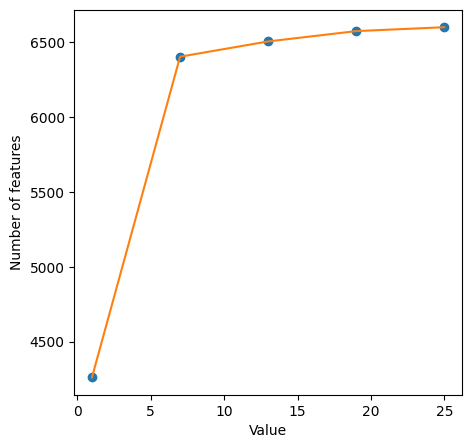

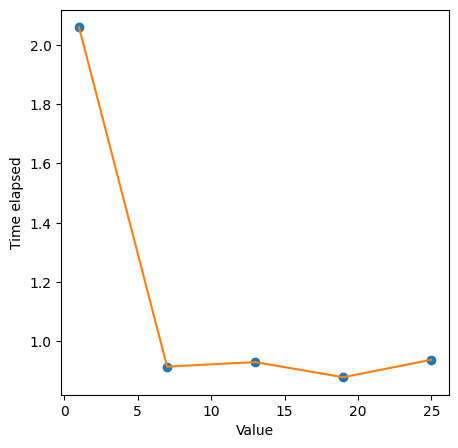

In [5]:
plt.figure(figsize=(5,5))
plt.plot(df['value'], df['n_features'], 'o')
plt.plot(df['value'], df['n_features'])
plt.xlabel('Value')
plt.ylabel('Number of features')
plt.show()

plt.figure(figsize=(5,5))
plt.plot(df['value'], df['timing'], 'o')
plt.plot(df['value'], df['timing'])
plt.xlabel('Value')
plt.ylabel('Time elapsed')
plt.show()